## Binary category of number of survived passengers from titanic dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


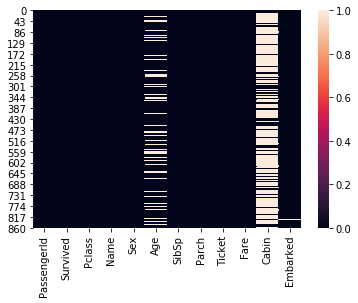

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [8]:
df.drop('Cabin', axis=1, inplace=True)

In [9]:
df.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [10]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df['Age'] = df.groupby(['Survived'])['Age'].apply(lambda x : x.fillna(x.mean()))

In [12]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [13]:
common_value = 'S'
df['Embarked'] = df['Embarked'].fillna(common_value)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
df.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
sex = pd.get_dummies(df.Sex, drop_first=True)
embarked = pd.get_dummies(df.Embarked, prefix='em', drop_first=True)

In [18]:
df = [df, sex, embarked]
df = pd.concat(df, axis=1)

In [19]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [20]:
X = df.drop('Survived', axis=1).values
y = df.Survived.values

In [21]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
#scaling values
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [23]:
import import_ipynb
from NN_module import NeuralNetwork

importing Jupyter notebook from NN_module.ipynb


In [24]:
NN = NeuralNetwork()

In [25]:
learning_rate = 0.01
iterations = 1000
hidden_nodes = 50
costs, iterations = NN.neural_network(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), learning_rate, iterations, hidden_nodes)

training epoch: 1   cost: 0.49404754033147263

Train accuracy:  84.69101123595506
Test accuracy:  78.77094972067039


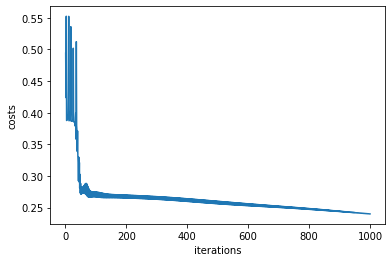

In [26]:
plt.plot(iterations, costs)
plt.xlabel('iterations')
plt.ylabel('costs')
plt.show()